In [1]:

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

#def function to look the images

def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(10,5))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

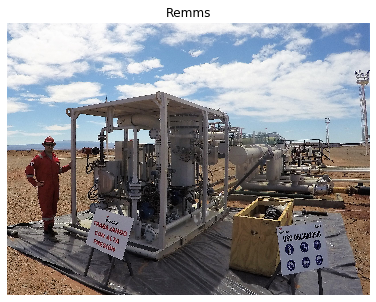

In [2]:
url1 = 'ds/img/marcos_remms.jpg'
url2 = 'ds/img/marcos.jpg'


img1 = plt.imread(url1)
img2 = plt.imread(url2)


show_image(img1, 'Remms')

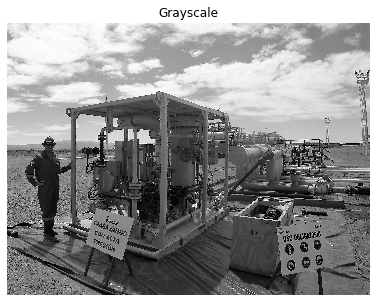

In [3]:
from skimage import color

grayscaled = color.rgb2gray(img1)
show_image(grayscaled, 'Grayscale')

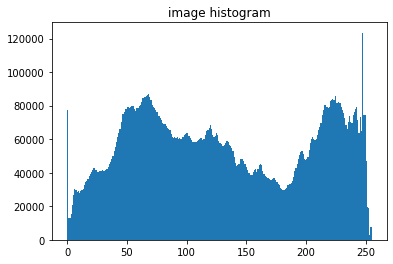

In [4]:
plt.title('image histogram')
plt.hist(img1.ravel(),bins=256)
plt.show()

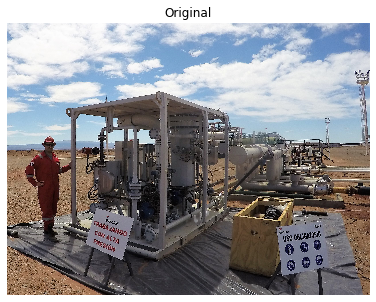

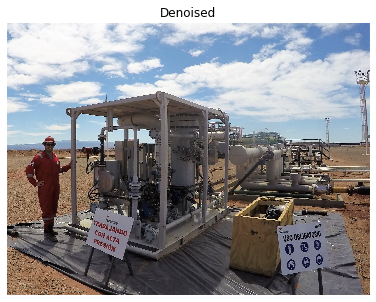

In [5]:

from skimage.restoration import denoise_bilateral

denoised_img = denoise_bilateral(img1,multichannel=True)

show_image(img1,'Original')
show_image(denoised_img,'Denoised')

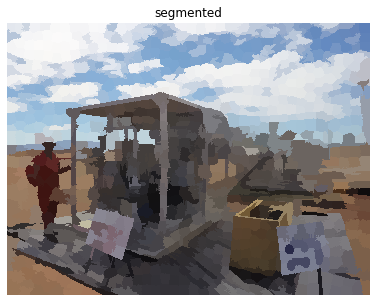

In [6]:
from skimage.segmentation import slic
from skimage.color import label2rgb

segments = slic(img1, n_segments=1200)

#Put segments on top of the original image to compare

segmented_image = label2rgb(segments,
                           img1,
                           kind='avg')

show_image(segmented_image, 'segmented')

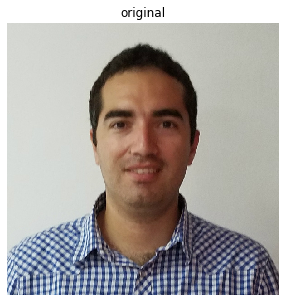

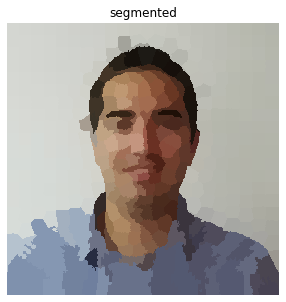

In [7]:
from skimage.segmentation import slic
from skimage.color import label2rgb

segments = slic(img2, n_segments=500)

#Put segments on top of the original image to compare

segmented_image = label2rgb(segments,
                           img2,
                           kind='avg')


show_image(img2, 'original')

show_image(segmented_image, 'segmented')


Harris Corner detector


In [86]:
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray


#convert image to grayscal
image = rgb2gray(img1)

#Apply the harris method

measure_image = corner_harris(image)

#finds the coordinates of the corners
coords = corner_peaks(measure_image, min_distance=10)

print("A total of ", len(coords), " corners were detected.")

A total of  419  corners were detected.


In [87]:
## fuction to show image with marks

def show_img_with_corners(image, coords, title="Corners detected "):
    plt.figure(figsize=(20,10))
    plt.imshow(image, interpolation='nearest',
              cmap='gray')
    plt.title(title)
    plt.plot(coords[:,1],coords[:,0],'+r',markersize=15)
    plt.axis('off')
    plt.show()
    

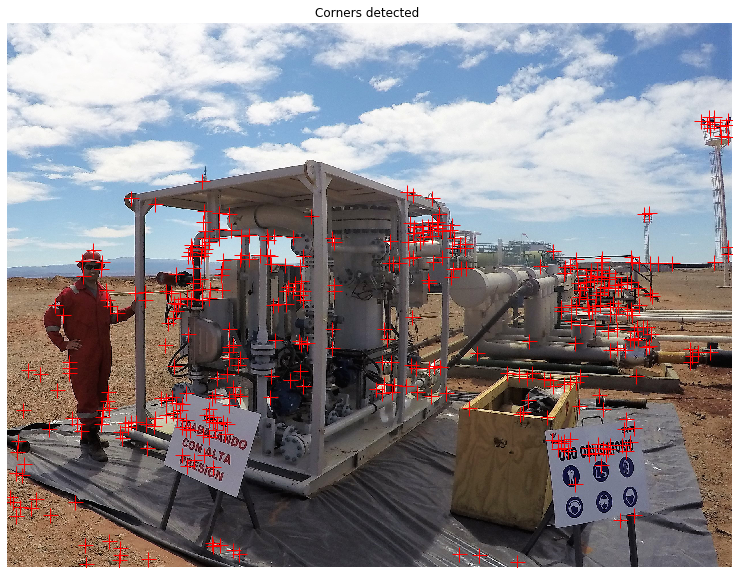

In [88]:
show_img_with_corners(img1,coords)

In [89]:
def show_detected_face(result,detected,title=" Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'],patch['r']),
                patch['width'],
                patch['height'],
                fill=False, color='r',
                linewidth=2
            ))
    plt.show()
    
def getFace(d):
    x,y = d['r'],d['c']
    width, height = d['r'] + d['width'], d['c'] + d['height']
    face = image[x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
    x,y = d['r'],d['c']
    width, height = d['r'] + d['width'],d['c'] + d['height']
    original[x:width, y:height] = gaussian_image
    return original

In [99]:
# Privacy Protection
from skimage import data
from skimage.feature import Cascade
from skimage.filters import gaussian

#Load the trained file from the module port
trained_file = data.lbp_frontal_face_cascade_filename()

detector = Cascade(trained_file)


#detect the faces
detected = detector.detect_multi_scale(img=img1,
                                      scale_factor=1.2,
                                      step_ratio=1,
                                      min_size=(10,10),
                                      max_size=(300,300))

for d in detected:
    #Obtain the face cropped form detected coord
    face = getFace(d)
   


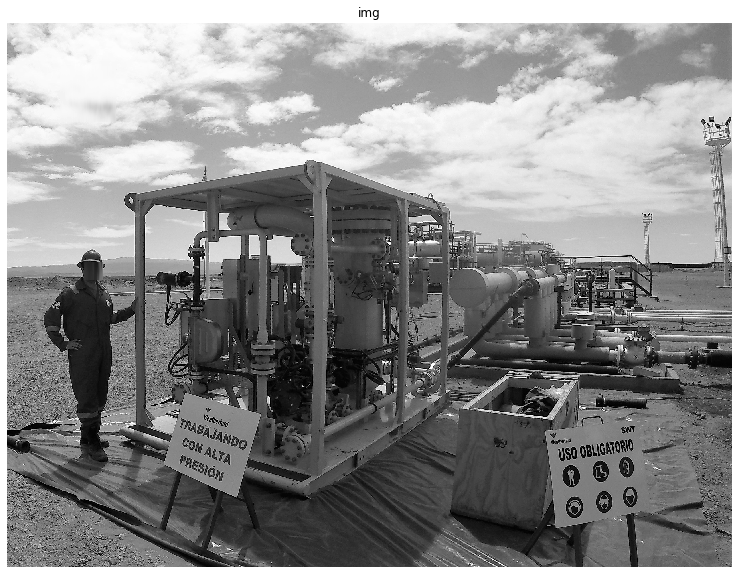

In [100]:
gaussian_face = gaussian(face, multichannel=True,
                        sigma=10)

resulting_image = mergeBlurryFace(image, gaussian_face)

show_image(resulting_image, 'img')